## 1. Understanding Data

In [1]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### Before Start
본격적으로 시작하기 전에 데이터에 대해서 아주 약간만 깊이 있게 이해해보는 시간을 가져보려고 합니다.

### Q. 디스크의 CSV파일의 용량은 그렇게 높진 않은데 메모리로 읽기만 하면 몇 배로 늘어나는 이유는?
캐글을 하시다 보면 이런 경험이 한번쯤은 다들 있으실 것 같습니다.   
분명히 CSV 파일로는 1GB 보다 아래였는데 판다스로 read를 하면 2~3GB로 늘어나는 경우가 종종 있는데, 이유가 무엇일까요?

### Load data

In [4]:
PATH = '../input/kakr-4th-competition/'
train = pd.read_csv(PATH + 'train.csv')
test  = pd.read_csv(PATH + 'test.csv')

### 데이터 확인

* id
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)
    * \>50K : 1
    * <=50K : 0

# 데이터 확인

In [5]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [6]:
# target에 해당하는 컬럼을 바로 label로 지정하고, train_data_set에서는 제외하는 것도 방법
label = train['income']

del train['income']

train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States


In [9]:
# lable에 대해 범위를 지정해서 값 변경, 대회 규칙에 따라서
label = label.map(lambda x : 1 if x== '>50K' else 0) # True/False 값을 int로 변형해서 저장

label

0        1
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int64

In [10]:
# id 컬럼은 필요 없는 컬럼이기 때문에 삭제

del train['id']
del test['id']

In [11]:
# 각 컬럼들에 대한 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.8+ MB


In [12]:
# 각 컬럼들 중 수치 값을 갖는 컬럼에 대한 통계적 수치 정보 확인

train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


# 결측치 처리

* workclass, occupation, native_country 컬럼에 결측치가 존재
* '?'로 표시된 데이터는 해당 컬럼의 최빈값으로 결측치를 처리


* 일반적으로는 최빈값을 통해 대체하는 경우가 많지만,
* 만약 다른 컬럼을 통해서 처리할 수 있다면 그렇게 하는 것이 더 좋은 방법
* ex) education_num 등


* 정답은 없고, 해당 데이터의 상태를 보고서 결정해야 함

In [13]:
has_na_colums = ['workclass', 'occupation', 'native_country']

for c in has_na_colums :
    # mode() 해당 컬럼의 최빈 값을 가져오는 함수
    train.loc[train[c] == '?', c]  = train[c].mode()[0]
    test.loc[test[c] == '?', c]  = test[c].mode()[0]

In [15]:
# 적용 후 결측치 처리가 된건지 확인
(train[has_na_colums] == '?').sum()

workclass         0
occupation        0
native_country    0
dtype: int64

# Log 변환

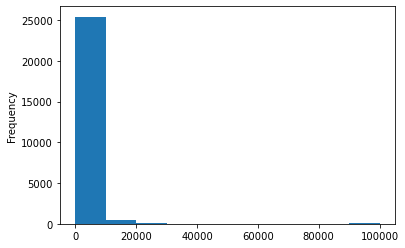

In [16]:
train['capital_gain'].plot.hist()

In [17]:
# 치우친 정도를 완화시키기 위해 log 변환 적용

train['log_capital_gain'] = train['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
test['log_capital_gain'] = test['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)

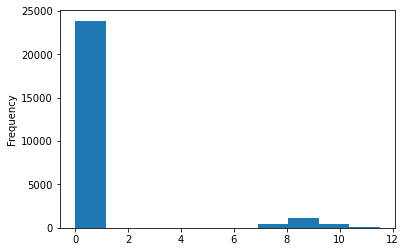

In [18]:
# 적용 후 확인

train['log_capital_gain'].plot.hist()

In [19]:
# 이제 원래 컬럼은 필요 없다고 판단하고 삭제

train = train.drop(columns=['capital_gain'])
test = test.drop(columns=['capital_gain'])

In [ ]:
# capital_loss 컬럼에도 적용

train['log_capital_loss'] = train['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
test['log_capital_loss'] = test['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)

train = train.drop(columns=['capital_loss'])
test = test.drop(columns=['capital_loss'])

train.head()